## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

## Dataset

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df  = pd.read_csv(url, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])
X   = df.iloc[:, :-1].values

## Experimento n_clusters=k

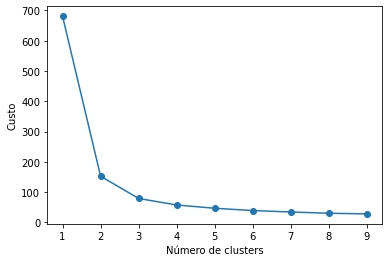

In [3]:
cost = []

for k in range(1, 10):
    # Criando o objeto KMeans
    kmeans = KMeans(n_clusters=k, random_state=0)
    
    # Treinando o modelo
    kmeans.fit(X)
    
    # Adicionando o custo a lista
    cost.append(kmeans.inertia_)

# Curva de custo
plt.plot(range(1, 10), cost, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Custo')
plt.show()

## Experimento n_clusters=3 (baseado no Dataset)

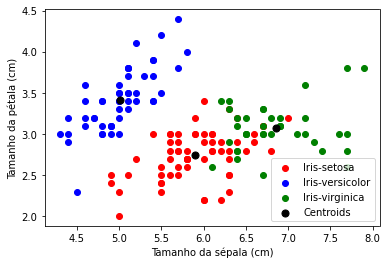

In [4]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
pred_y = kmeans.predict(X)

# Gráfico dos grupos
plt.scatter(X[pred_y == 0, 0], X[pred_y == 0, 1], c = 'red', label = 'Iris-setosa')
plt.scatter(X[pred_y == 1, 0], X[pred_y == 1, 1], c = 'blue', label = 'Iris-versicolor')
plt.scatter(X[pred_y == 2, 0], X[pred_y == 2, 1], c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],s = 50, c = 'black', label = 'Centroids')
plt.xlabel('Tamanho da sépala (cm)')
plt.ylabel('Tamanho da pétala (cm)')
plt.legend()
plt.show()